# WEEK 04
# Encounter 07 - A/B Testing
# Project Challenge

### Task Description

Bike dataset has the information about the weather that is stored in columns such as `weather`, `temp`, `atemp`, `humidity`, `windspeed`. Create a notebook where you perfom a hypothesis testing that checks if there is a significant difference between two of the temperature columns: `temp` and `atemp`. Use the `scipy.stats` and t-test statistics.

In [15]:
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read 'bikes' data
bikes = pd.read_csv('../data/bikes_with_bins.csv', index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week,year,part_of_day
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,January,Saturday,2011,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,January,Saturday,2011,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,January,Saturday,2011,night
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,January,Saturday,2011,night
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,January,Saturday,2011,night


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       17379 non-null  int64  
 1   holiday      17379 non-null  int64  
 2   workingday   17379 non-null  int64  
 3   weather      17379 non-null  int64  
 4   temp         17379 non-null  float64
 5   atemp        17379 non-null  float64
 6   humidity     17379 non-null  int64  
 7   windspeed    17379 non-null  float64
 8   casual       10886 non-null  float64
 9   registered   10886 non-null  float64
 10  count        17379 non-null  int64  
 11  hour         17379 non-null  int64  
 12  month_name   17379 non-null  object 
 13  day_of_week  17379 non-null  object 
 14  year         17379 non-null  int64  
 15  part_of_day  17379 non-null  object 
dtypes: float64(5), int64(8), object(3)
memory usage: 2.3+ MB


In [43]:
temperatures = bikes[['temp', 'atemp', 'season', 'year']]
temperatures.sample(10)

,temp,atemp,season,year
datetime,,,,
2012-07-14 20:00:00,29.52,35.605,3,2012
2012-08-06 08:00:00,28.70,33.335,3,2012
2011-01-15 03:00:00,6.56,11.365,1,2011
2011-12-12 15:00:00,13.12,16.665,4,2011
2011-08-12 02:00:00,25.42,31.060,3,2011
2011-03-24 14:00:00,12.30,15.150,2,2011
2012-12-10 18:00:00,18.86,22.725,4,2012
2011-06-29 07:00:00,28.70,32.575,3,2011
2011-05-08 05:00:00,18.04,21.970,2,2011


In [26]:
# melting 'temperatiures' dataset to plot boxplot for both 'temp' and 'atemp'
temperatures_melted = temperatures.melt(id_vars=['season'],
                                        value_vars=['temp', 'atemp'],
                                        var_name = 'temp_type', 
                                        value_name= 'temp_value',
                                        ignore_index=False
                                       )
temperatures_melted.sample(10)

,season,temp_type,temp_value
datetime,,,
2011-02-12 23:00:00,1,temp,9.020
2011-09-21 09:00:00,3,temp,22.960
2012-11-23 15:00:00,4,temp,19.680
2011-09-12 13:00:00,3,temp,29.520
2012-03-06 11:00:00,1,temp,10.660
2011-01-16 06:00:00,1,atemp,12.880
2011-06-07 06:00:00,2,temp,24.600
2011-10-31 03:00:00,4,atemp,12.880
2011-11-14 02:00:00,4,atemp,22.725


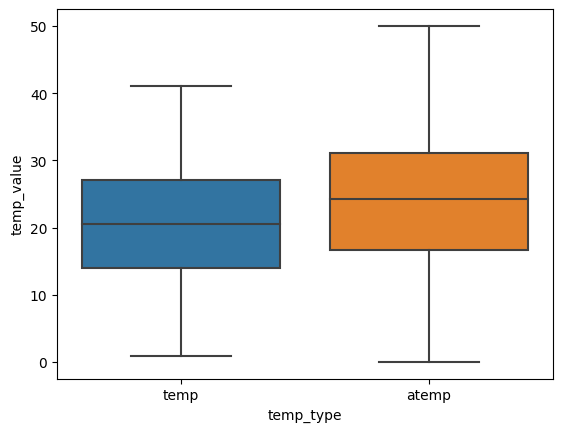

In [34]:
sns.boxplot(data=temperatures_melted, y='temp_value', x='temp_type');


### Hypothesis Testing 

Check if there is a significant difference between two of the temperature columns: `temp` and `atemp`

In [35]:
#temperatures['temp'] is a Series of all tempertures for 2 years (complete bikes dataset)
#temperatures['atemp'] is a Series of all real-feel-tempertures for 2 years (complete bikes dataset)

sps.ttest_ind(temperatures['temp'], temperatures['atemp'], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=-38.550838713271254, pvalue=0.0)

### Explaination:

1. p-value < 𝛼 (0.0 < 0.05), then we reject 𝐻0 and conclude that the groups are indeed different.
2. It means 'temp' and 'atemp' are indeed different.

## [EXTRA]

### Example 2

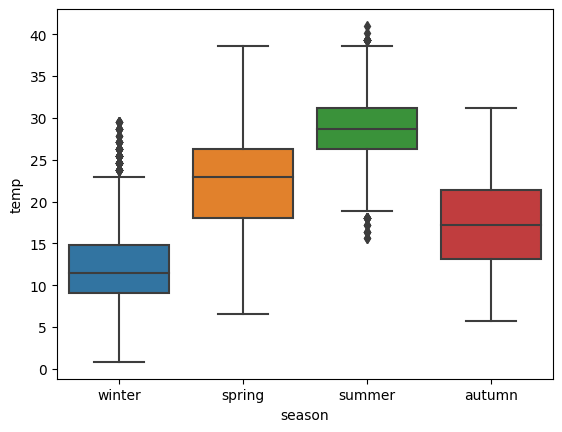

In [48]:
# box plot of seasonal temperatures (both years included)
sns.boxplot(data=temperatures, y='temp', x='season');
plt.xticks(ticks=[0, 1, 2, 3], labels=['winter', 'spring', 'summer', 'autumn']);

In [49]:
# compare spring and autumn temperatures (as their have a common interval)
temperatures_spring = temperatures[temperatures['season']==2]
temperatures_autumn = temperatures[temperatures['season']==4]

sps.ttest_ind(temperatures_spring['temp'], temperatures_autumn['atemp'], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=12.845540587052653, pvalue=2.002517160784336e-37)

In [50]:
# RESULTS: spring and autumn temperatures are different (as pvalue is less than alfa=0.05)

### Example 3

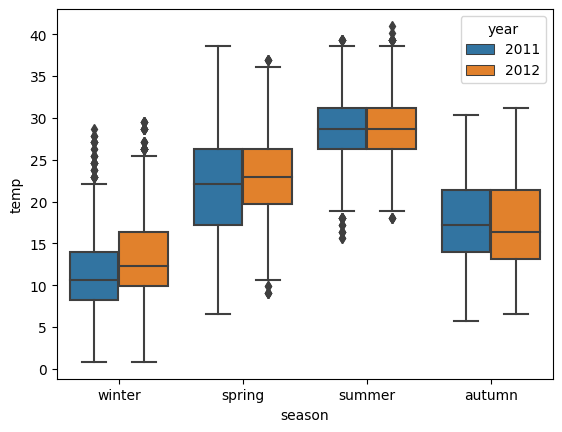

In [44]:
# box plot of seasonal temperatures for different years (2011 and 2012)
sns.boxplot(data=temperatures, y='temp', x='season', hue='year');
plt.xticks(ticks=[0, 1, 2, 3], labels=['winter', 'spring', 'summer', 'autumn']);

In [55]:
# compare winter temperatures for 2011 and 2012

temp_winter_2011 = temperatures[(temperatures['season']==1)&(temperatures['year']==2011)]
temp_winter_2012 = temperatures[(temperatures['season']==1)&(temperatures['year']==2012)]

sps.ttest_ind(temp_winter_2011['temp'], temp_winter_2012['temp'], nan_policy='omit', equal_var=False)   

# -> Temperatures are DIFFERENT: pvalue < alfa (0.05)

Ttest_indResult(statistic=-13.002904176746798, pvalue=6.20594200268096e-38)

In [56]:
# compare spring temperatures for 2011 and 2012

temp_spring_2011 = temperatures[(temperatures['season']==2)&(temperatures['year']==2011)]
temp_spring_2012 = temperatures[(temperatures['season']==2)&(temperatures['year']==2012)]

sps.ttest_ind(temp_spring_2011['temp'], temp_spring_2012['temp'], nan_policy='omit', equal_var=False)   

# -> Temperatures are DIFFERENT: pvalue < alfa (0.05)

Ttest_indResult(statistic=-4.803574967171726, pvalue=1.613351205024615e-06)

In [57]:
# compare summer temperatures for 2011 and 2012

temp_summer_2011 = temperatures[(temperatures['season']==3)&(temperatures['year']==2011)]
temp_summer_2012 = temperatures[(temperatures['season']==3)&(temperatures['year']==2012)]

sps.ttest_ind(temp_summer_2011['temp'], temp_summer_2012['temp'], nan_policy='omit', equal_var=False)   

# -> Temperatures are DIFFERENT: pvalue < alfa (0.05)

Ttest_indResult(statistic=-3.612921985321197, pvalue=0.00030607687454285774)

In [58]:
# compare autumn temperatures for 2011 and 2012

temp_autumn_2011 = temperatures[(temperatures['season']==4)&(temperatures['year']==2011)]
temp_autumn_2012 = temperatures[(temperatures['season']==4)&(temperatures['year']==2012)]

sps.ttest_ind(temp_autumn_2011['temp'], temp_autumn_2012['temp'], nan_policy='omit', equal_var=False)   

# -> Temperatures are SIMILAR: pvalue (0.08) > alfa (0.05)

Ttest_indResult(statistic=1.7277322971925952, pvalue=0.0841092333618878)